<a href="https://colab.research.google.com/github/cramirezda/micro/blob/main/Assignment_6_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT 6
# *Carlos Fernando Ramírez Dávila*

## ECO 50213: Advanced Microeconometrics
## May 2, 2025

Please complete your code and text answers in this notebook, then export the notebook to PDF format. Use the online submission feature of Canvas to upload your PDF before 6:00 p.m. on Friday, May 9.

You are encouraged to work together on the assignments. AI tools may be used to assist in coding, debugging, or understanding concepts. However, the final submission must be your own work, written in your own words, and reflect your own understanding.

In [1]:
import pandas as pd
import numpy as np
!pip install pyfixest
import pyfixest as pf
from pyfixest import feols

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.2/607.2 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.7 MB/s eta 0:00:00


In [79]:
pip install --upgrade pyfixest

In [96]:
import matplotlib.pyplot as plt


## Question 1: Concealed weapons and crime

This exercise expands on the analysis of gun laws in the United States by the economist John Lott in his influential and controversial book, *More Guns, Less Crime*. Lott claims that rates of violent crime go down when states pass "shall issue" concealed carry laws. These laws instruct local authorities to issue a concealed weapons permit to all applicants, with limited restrictions. Lott argues that these laws deter violent crime because criminals are less willing to attack someone who might be carrying a concealed weapon.

The following code imports the dataset `guns`. Each observation in the dataset is a state ($stateid$) and year ($year$). The main regressor of interest is the dummy variable $shall$, which is equal to 1 if the state has a concealed carry law in a particular year. The dependent variable is $\log(vio)$, the log of the violent crime rate in the state and year.

In [123]:
# Load data
url = "https://raw.githubusercontent.com/sdmcrae/econometrics/master/datasets/guns.csv"

df = pd.read_csv(url)
print(df.head())

   year    vio   mur    rob  incarc_rate    pb1064    pw1064    pm1029  \
0    77  414.4  14.2   96.8           83  8.384873  55.12291  18.17441   
1    78  419.1  13.3   99.1           94  8.352101  55.14367  17.99408   
2    79  413.3  13.2  109.5          144  8.329575  55.13586  17.83934   
3    80  448.5  13.2  132.1          141  8.408386  54.91259  17.73420   
4    81  470.5  11.9  126.5          149  8.483435  54.92513  17.67372   

        pop    avginc   density  stateid  shall  
0  3.780403  9.563148  0.074552        1      0  
1  3.831838  9.932000  0.075567        1      0  
2  3.866248  9.877028  0.076245        1      0  
3  3.900368  9.541428  0.076829        1      0  
4  3.918531  9.548351  0.077187        1      0  


In [124]:
df['logvio']=np.log(df['vio'])

The variables in this dataset are:
- $year$: Year (1977-1999)
- $vio$: violent crime rate (incidents per 100,000 members of the population)
- $mur$: murder rate (incidents per 100,000)
- $rob$: robbery rate (incidents per 100,000)
- $incarc\_rate$: incarceration rate in the state in the previous year (sentenced prisoners per 100,000 residents; value for the previous year)
- $pm1029$: percent of state population that is male, ages 10 to 29
- $pw1064$: percent of state population that is white, ages 10 to 64
- $pb1064$: percent of state population that is black, ages 10 to 64
- $pop$: state population, in millions of people
- $avginc$: real per capita personal income in the state, in thousands of dollars
- $density$: population per square mile of land area, divided by 1000
- $stateid$: ID number of states (Alabama = 1, Alaska = 2, etc.)
- $shall$: 1 if the state has a shall-carry law in effect in that year, otherwise 0

You will estimate six different models for the effect of concealed carry laws on $\log(vio)$. Use `pf.feols` to run these regressions, then `etable` to report all of these results in a single regression table, with one column for each model. Use heteroskedasticity-consistent standard errors for the first five regressions. In the final regression, you will see the effect of clustering the standard errors by state.

1. **Pooled estimator**

   - Regress $\log(vio)$ on $shall$:
   
     \begin{align*}
     \log(vio_{it}) &= \beta_0 + \beta_1 shall_{it} + u_{it}
     \end{align*}

   - For panel data, this regression is known as the **pooled estimator**, because it estimates the standard OLS model with no fixed effects. Report your results in Column 1 of your regression table.
   - What is your interpretation of $\hat{\beta}_1$ for this regression?

In [166]:
# list for unique values of stateid
states = df['stateid'].unique()
states

array([ 1,  2,  4,  5,  6,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56])

In [152]:
mod1 = feols('logvio ~ shall', data=df)
mod1.summary()


###

Estimation:  OLS
Dep. var.: logvio, Fixed effects: 0
Inference:  iid
Observations:  1173

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| Intercept     |      6.135 |        0.021 |   296.130 |      0.000 |  6.094 |   6.176 |
| shall         |     -0.443 |        0.042 |   -10.539 |      0.000 | -0.525 |  -0.361 |
---
RMSE: 0.617 R2: 0.087 


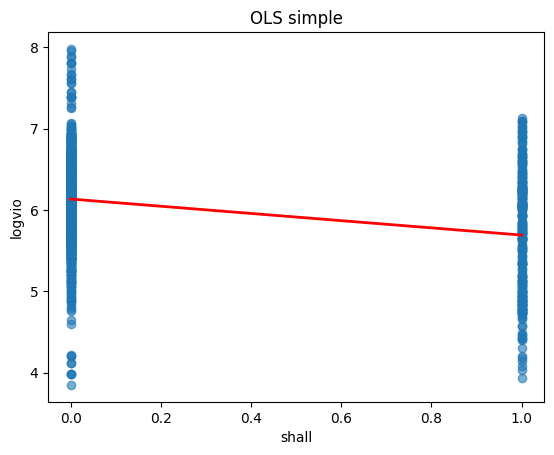

In [153]:

# Extraer coeficientes
params1   = mod1.coef()
intercept = params1['Intercept']
slope     = params1['shall']

# Grid para la línea
x_grid = np.linspace(df['shall'].min(), df['shall'].max(), 100)
y_grid = intercept + slope * x_grid

# Gráfico
plt.figure()
plt.scatter(df['shall'], df['logvio'], alpha=0.6)
plt.plot(x_grid, y_grid, color='red', lw=2)
plt.title('OLS simple')
plt.xlabel('shall')
plt.ylabel('logvio')
plt.show()

2. **Pooled estimator with control variables**

   - Repeat your regression from (1), with additional control variables: $incarc\_rate$ (incarceration rate), $density$ (population density), and $avginc$ (average income):

     \begin{align*}
     \log(vio_{it}) &= \beta_0 + \beta_1 shall_{it} + \beta_2 incarc\_rate_{it} + \beta_3 density_{it} + \beta_4 avginv_{it} + u_{it}
     \end{align*}

   - Report your results in Column 2 of your regression table.
   - Does adding the control variables change the estimated effect of a shall-issue law from regression (1)?
   - Suggest a variable that varies across states but plausibly varies little over time and that could cause omitted variable bias in regression (2).

In [154]:
# Ahora añadimos dos variables de control z1 y z2
mod2 = feols('logvio ~ shall + incarc_rate + avginc', data=df)
print(mod2.summary())


###

Estimation:  OLS
Dep. var.: logvio, Fixed effects: 0
Inference:  iid
Observations:  1173

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| Intercept     |      5.296 |        0.080 |    65.886 |      0.000 |  5.139 |   5.454 |
| shall         |     -0.477 |        0.033 |   -14.401 |      0.000 | -0.541 |  -0.412 |
| incarc_rate   |      0.002 |        0.000 |    21.248 |      0.000 |  0.002 |   0.002 |
| avginc        |      0.030 |        0.006 |     4.842 |      0.000 |  0.018 |   0.043 |
---
RMSE: 0.485 R2: 0.436 
None


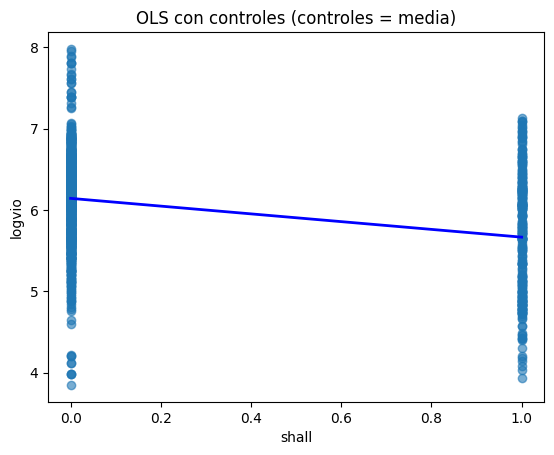

In [155]:
# Grid y DataFrame para predecir
x_grid = np.linspace(df['shall'].min(), df['shall'].max(), 100)
mean_ctrls = {
    'incarc_rate': df['incarc_rate'].mean(),
    'density':           df['density'].mean(),
    'avginc':           df['avginc'].mean()
}
new_df = pd.DataFrame({'shall': x_grid}).assign(**mean_ctrls)

# Predicciones
y_grid = mod2.predict(new_df)

# Gráfico
plt.figure()
plt.scatter(df['shall'], df['logvio'], alpha=0.6)
plt.plot(x_grid, y_grid, color='blue', lw=2)
plt.title('OLS con controles (controles = media)')
plt.xlabel('shall')
plt.ylabel('logvio')
plt.show()

3. **State fixed effects**

   - Repeat your regression from (2), this time with the addition of state fixed effects:

     \begin{align*}
     \log(vio_{it}) &= \beta_0 + \beta_1 shall_{it} + \beta_2 incarc\_rate_{it} + \beta_3 density_{it} + \beta_4 avginv_{it} + \alpha_i + u_{it}
     \end{align*}

   - Report your results in Column 3 of your regression table.
   - Do you find a difference in your estimate of $\beta_1$ compared to the pooled regressions (1) and (2)? What does this result imply about whether or not the $\alpha_i$ terms are distributed independently of the other regressors?

In [157]:

mod3 = feols('logvio ~ shall + incarc_rate + density + avginc | stateid', data=df)
print(model_fe_region.summary())


###

Estimation:  OLS
Dep. var.: logvio, Fixed effects: stateid
Inference:  CRV1
Observations:  1173

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| shall         |      0.021 |        0.041 |     0.525 |      0.602 | -0.061 |   0.103 |
| incarc_rate   |      0.000 |        0.000 |     1.934 |      0.059 | -0.000 |   0.001 |
| density       |      0.161 |        0.091 |     1.760 |      0.084 | -0.023 |   0.345 |
| avginc        |      0.020 |        0.013 |     1.487 |      0.143 | -0.007 |   0.047 |
---
RMSE: 0.165 R2: 0.935 R2 Within: 0.133 
None


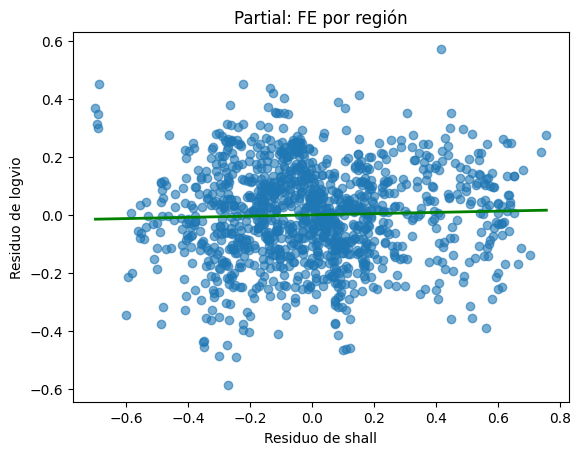

In [158]:
# Residuales de la regresión de y sobre controles + region
res_y = feols('logvio ~ incarc_rate + density + avginc | stateid', data=df).resid()
# Instead of accessing values, just use res_y as it is already a numpy array
res_y_values = res_y

# Residuales de shall sobre los mismos controles + region
res_x = feols('shall     ~ incarc_rate + density + avginc | stateid', data=df).resid()
# Instead of accessing values, just use res_x as it is already a numpy array
res_x_values = res_x

# Ajuste de la línea parcial
coef_par   = np.polyfit(res_x_values, res_y_values, 1)
x_line     = np.linspace(res_x_values.min(), res_x_values.max(), 100)
y_line     = coef_par[1] + coef_par[0] * x_line

# Gráfico
plt.figure()
plt.scatter(res_x_values, res_y_values, alpha=0.6)
plt.plot(x_line, y_line, color='green', lw=2)
plt.title('Partial: FE por región')
plt.xlabel('Residuo de shall')
plt.ylabel('Residuo de logvio')
plt.show()

4. **Time fixed effects**

   - Repeat your regression from (2), this time with the addition of time fixed effects instead of state fixed effects:

     \begin{align*}
     \log(vio_{it}) &= \beta_0 + \beta_1 shall_{it} + \beta_2 incarc\_rate_{it} + \beta_3 density_{it} + \beta_4 avginv_{it} + \lambda_t + u_{it}
     \end{align*}

   - Report your results in Column 4 of your regression table.
   - Do you find a difference in your estimate of $\beta_1$ compared to the pooled regressions (1) and (2)? What does this result imply about whether or not the $\lambda_t$ terms are distributed independently of the other regressors?

In [159]:
# Efectos fijos por año (digamos que df tiene una columna 'year')
mod4 = feols('logvio ~ shall + incarc_rate + density + avginc | year', data=df)
print(model_fe_time.summary())


###

Estimation:  OLS
Dep. var.: logvio, Fixed effects: stateid+year
Inference:  CRV1
Observations:  1173

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| shall         |      0.006 |        0.040 |     0.147 |      0.884 | -0.075 |   0.087 |
| incarc_rate   |     -0.000 |        0.000 |    -0.039 |      0.969 | -0.001 |   0.000 |
| density       |     -0.057 |        0.134 |    -0.425 |      0.673 | -0.326 |   0.212 |
| avginc        |      0.005 |        0.015 |     0.349 |      0.729 | -0.024 |   0.035 |
---
RMSE: 0.139 R2: 0.954 R2 Within: 0.002 
None


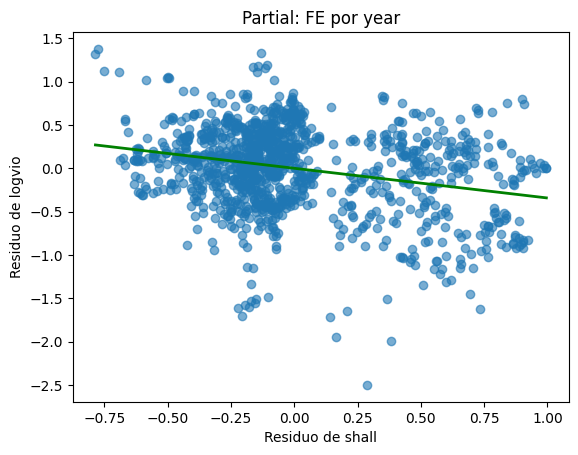

In [160]:
# Residuales de la regresión de y sobre controles + region
res_y = feols('logvio ~ incarc_rate + density + avginc | year', data=df).resid()
# Instead of accessing values, just use res_y as it is already a numpy array
res_y_values = res_y

# Residuales de shall sobre los mismos controles + region
res_x = feols('shall     ~ incarc_rate + density + avginc | year', data=df).resid()
# Instead of accessing values, just use res_x as it is already a numpy array
res_x_values = res_x

# Ajuste de la línea parcial
coef_par   = np.polyfit(res_x_values, res_y_values, 1)
x_line     = np.linspace(res_x_values.min(), res_x_values.max(), 100)
y_line     = coef_par[1] + coef_par[0] * x_line

# Gráfico
plt.figure()
plt.scatter(res_x_values, res_y_values, alpha=0.6)
plt.plot(x_line, y_line, color='green', lw=2)
plt.title('Partial: FE por year')
plt.xlabel('Residuo de shall')
plt.ylabel('Residuo de logvio')
plt.show()

5. **Two-way fixed effects**

   - Repeat your regression from (2), this time with the addition of state and time fixed effects:

     \begin{align*}
     \log(vio_{it}) &= \beta_0 + \beta_1 shall_{it} + \beta_2 incarc\_rate_{it} + \beta_3 density_{it} + \beta_4 avginv_{it} + \alpha_i + \lambda_t + u_{it}
     \end{align*}

   - Report your results in Column 5 of your regression table.
   - Do you find a difference in your estimate of $\beta_1$ compared to the pooled regressions (1) and (2)?

In [161]:
# Efectos fijos por año (digamos que df tiene una columna 'year')
mod5 = feols('logvio ~ shall + incarc_rate + density + avginc | stateid + year', data=df)
print(model_fe_time.summary())


###

Estimation:  OLS
Dep. var.: logvio, Fixed effects: stateid+year
Inference:  CRV1
Observations:  1173

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| shall         |      0.006 |        0.040 |     0.147 |      0.884 | -0.075 |   0.087 |
| incarc_rate   |     -0.000 |        0.000 |    -0.039 |      0.969 | -0.001 |   0.000 |
| density       |     -0.057 |        0.134 |    -0.425 |      0.673 | -0.326 |   0.212 |
| avginc        |      0.005 |        0.015 |     0.349 |      0.729 | -0.024 |   0.035 |
---
RMSE: 0.139 R2: 0.954 R2 Within: 0.002 
None


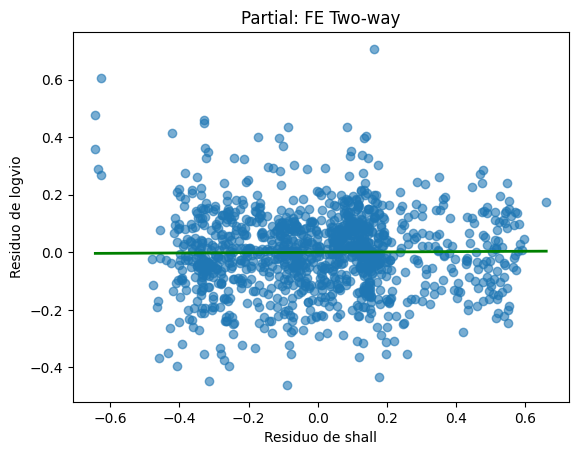

In [162]:
# Residuales de la regresión de y sobre controles + region
res_y = feols('logvio ~ incarc_rate + density + avginc | stateid + year', data=df).resid()
# Instead of accessing values, just use res_y as it is already a numpy array
res_y_values = res_y

# Residuales de shall sobre los mismos controles + region
res_x = feols('shall     ~ incarc_rate + density + avginc | stateid + year', data=df).resid()
# Instead of accessing values, just use res_x as it is already a numpy array
res_x_values = res_x

# Ajuste de la línea parcial
coef_par   = np.polyfit(res_x_values, res_y_values, 1)
x_line     = np.linspace(res_x_values.min(), res_x_values.max(), 100)
y_line     = coef_par[1] + coef_par[0] * x_line

# Gráfico
plt.figure()
plt.scatter(res_x_values, res_y_values, alpha=0.6)
plt.plot(x_line, y_line, color='green', lw=2)
plt.title('Partial: FE Two-way')
plt.xlabel('Residuo de shall')
plt.ylabel('Residuo de logvio')
plt.show()

6. **Two-way fixed effects with clustered standard errors**

   - Repeat your regression from (5), but cluster your standard errors by state.
   - Report your results in Column 6 of your regression table.
   - What happens to your standard errors when you cluster by state?

In [163]:
# Efectos fijos por año (digamos que df tiene una columna 'year')
mod6 = feols('logvio ~ shall + incarc_rate + density + avginc | stateid + year', data=df,vcov={"CRV1": "stateid"})
print(model_fe_time.summary())


###

Estimation:  OLS
Dep. var.: logvio, Fixed effects: stateid+year
Inference:  CRV1
Observations:  1173

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| shall         |      0.006 |        0.040 |     0.147 |      0.884 | -0.075 |   0.087 |
| incarc_rate   |     -0.000 |        0.000 |    -0.039 |      0.969 | -0.001 |   0.000 |
| density       |     -0.057 |        0.134 |    -0.425 |      0.673 | -0.326 |   0.212 |
| avginc        |      0.005 |        0.015 |     0.349 |      0.729 | -0.024 |   0.035 |
---
RMSE: 0.139 R2: 0.954 R2 Within: 0.002 
None


In [164]:
pf.etable([mod1,mod2,mod3,mod4,mod5,mod6])

GT(_tbl_data=   level_0               level_1                       0  \
0     coef                 shall  -0.443*** <br> (0.042)   
1     coef           incarc_rate                           
2     coef                avginc                           
3     coef               density                           
4     coef             Intercept   6.135*** <br> (0.021)   
5       fe               stateid                       -   
6       fe                  year                       -   
7    stats          Observations                    1173   
8    stats             S.E. type                     iid   
9    stats         R<sup>2</sup>                   0.087   
10   stats  R<sup>2</sup> Within                       -   

                         1                   2                       3  \
0   -0.477*** <br> (0.033)  0.021 <br> (0.041)  -0.343*** <br> (0.027)   
1    0.002*** <br> (0.000)  0.000 <br> (0.000)   0.002*** <br> (0.000)   
2    0.030*** <br> (0.006)  0.020 <br> (0.013)   0.060*** <br> (0.007)   
3                           0.161 <br> (0.091)    -0.048* <br> (0.021)   
4    5.296*** <br> (0.080)                                               
5                        -                   x                       -   
6                        -                   -                       x   
7                     1173                1173                    1173   
8                      iid         by: stateid                by: year   
9                    0.436               0.935                   0.479   
10                       -               0.133                   0.463   

                      4                    5  
0    0.006 <br> (0.040)   0.006 <br> (0.040)  
1   -0.000 <br> (0.000)  -0.000 <br> (0.000)  
2    0.005 <br> (0.015)   0.005 <br> (0.015)  
3   -0.057 <br> (0.134)  -0.057 <br> (0.134)  
4                                             
5                     x                    x  
6                     x                    x  
7                  1173                 1173  
8           by: stateid          by: stateid  
9                 0.954                0.954  
10                0.002                0.002  , _body=<great_tables._gt_data.Body object at 0x7bc22de11510>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='3', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None), ColInfo(var='4', type=<ColInfoTypeEnum.default: 1>, column_label='(5)', column_align='center', column_width=None), ColInfo(var='5', type=<ColInfoTypeEnum.default: 1>, column_label='(6)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7bc22da0e190>, _spanners=Spanners([SpannerInfo(spanner_id='logvio', spanner_level=1, spanner_label='logvio', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2', '3', '4', '5'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7bc22d8a1590>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scs

7. **Conclusion**

   - Based on your analysis, what conclusions would you draw about the effects of concealed weapons laws on crime rates? Does the data support Lott's argument that more guns leads to less crime?

## Question 2: Monte Carlo study of clustered standard errors in panel data

We mentioned in the lectures that **cluster‑robust standard errors** can be unreliable when the number of clusters is small. The goal of this Monte Carlo exercise is to measure the empirical size of the 5% two‑sided test of $H_0: \beta = 0$ in a simple panel‑data model, varying only:
- the number of clusters, $G$, and  
- the number of observations per cluster, $T$.

1. **Constructing the simulated data**

   - Simulate data from the following model:
   \begin{align*}
x_{gt} &\sim \mathcal N(0,1) \\
\alpha_g &\sim \mathcal N(0,1) \\
u_{gt} &\sim \mathcal N(0,1) \\
y_{gt} &= \beta x_{gt} + \alpha_g + u_{gt}
\end{align*}
where $g = 1,\dots,G,\; t = 1,\dots,T$. Assume the true slope $\beta = 0$.
   - Note that $\alpha_g$ is constant for all $T$ observations within a group $g$.
   - Write your code so that you can vary $G$ and $T$.

In [86]:
def create_simulated_panel(G, T, beta=0.0, seed=None):

    # indices
    group = np.repeat(np.arange(G), T)
    time  = np.tile(np.arange(T), G)
    # regresor y componentes
    x = np.random.normal(size=G*T)
    alpha = np.random.normal(size=G)
    u = np.random.normal(size=G*T)
    # respuesta
    y = beta * x + np.repeat(alpha, T) + u

    return pd.DataFrame({
        'y': y,
        'x': x,
        'group': group,
        'time': time
    })

def single_trial(G, T, beta=0.0, sig_level=0.05):

    df = create_simulated_panel(G, T, beta)
    # estimación con efectos fijos de grupo y SE clustered
    df["group"] = df["group"].astype("category")
    model = smf.ols("y ~ x + C(group)", data=df).fit(cov_type="cluster", cov_kwds={"groups": df["group"]})
    pval = model.pvalues["x"]
    return (pval < sig_level)

def montecarlo_fe(G, T, iterations=2000, beta=0.0, sig_level=0.05):

    rejects = 0
    for i in range(iterations):
        if single_trial(G, T, beta, sig_level):
            rejects += 1
    return rejects / iterations


In [87]:
create_simulated_panel(G=50, T=10)

,y,x,group,time
0,-0.355956,0.196951,0,0
1,-1.176001,-0.760170,0,1
2,-0.760231,-0.147689,0,2
3,-1.434368,-1.089203,0,3
4,-0.167151,-1.243284,0,4
...,...,...,...,...
495,-1.537955,-1.178207,49,5
496,1.067642,-0.514709,49,6
497,0.574693,0.144694,49,7
498,0.277202,-0.728027,49,8


2. **Estimation and hypothesis testing**
   
   - Estimate the model $y_{gt} = \beta x_{gt} + \alpha_g + u_{gt}$, where $\alpha_g$ is a group fixed effect. For example, you could use the `pf.feols` function with group fixed effects.
   - Use standard errors clustered on the group variable $g$.
   - Using a 5% significance level, record whether you reject $H_0: \beta = 0$.
   - Repeat this process 2000 times and return the average rejection rate.
   - Given that $H_0$ is true ($\beta$ really does equal 0), the rejection rate for a 5% test should be close to 5%.

In [89]:
sim_1= montecarlo_fe(G=50, T=10, iterations=2000)
print(f"Tasa de rechazo promedio (H0: β=0): {sim_1:.3f}")

Tasa de rechazo promedio (H0: β=0): 0.036


3. **Varying $G$ and $T$**
   
   - Create a grid of values of $G$ and $T$. For example, $G \in \{5,10,20,30,50,100,250\}$ and $T \in \{5, 10, 20, 50, 100\}$
   - For every $(G,T)$ pair, run the 2000 replications in (2) and store the rejection rate that is returned.
   - Present your results in a table where $G$ varies across the rows and $T$ varies across the columns.

In [91]:
# Grid de valores
G_values = [5, 10, 20, 30, 50, 100, 250]
T_values = [5, 10, 20, 50, 100]

# Crear DataFrame vacío para resultados
results = pd.DataFrame(index=G_values, columns=T_values)

# Ejecutar simulaciones
for G in G_values:
    for T in T_values:
        print(f"Corriendo simulación para G={G}, T={T}...")
        tasa = montecarlo_fe(G, T, iterations=2000, beta=0.0, sig_level=0.05)
        results.loc[G, T] = tasa


# Mostrar resultados
print("Tabla de tasas de rechazo (H0: β = 0):")
print(results)



Corriendo simulación para G=5, T=5...
Corriendo simulación para G=5, T=10...
Corriendo simulación para G=5, T=20...
Corriendo simulación para G=5, T=50...
Corriendo simulación para G=5, T=100...
Corriendo simulación para G=10, T=5...
Corriendo simulación para G=10, T=10...
Corriendo simulación para G=10, T=20...
Corriendo simulación para G=10, T=50...
Corriendo simulación para G=10, T=100...
Corriendo simulación para G=20, T=5...
Corriendo simulación para G=20, T=10...
Corriendo simulación para G=20, T=20...
Corriendo simulación para G=20, T=50...
Corriendo simulación para G=20, T=100...
Corriendo simulación para G=30, T=5...
Corriendo simulación para G=30, T=10...
Corriendo simulación para G=30, T=20...
Corriendo simulación para G=30, T=50...
Corriendo simulación para G=30, T=100...
Corriendo simulación para G=50, T=5...
Corriendo simulación para G=50, T=10...
Corriendo simulación para G=50, T=20...
Corriendo simulación para G=50, T=50...
Corriendo simulación para G=50, T=100...
Corri

In [92]:
results

,5,10,20,50,100
5,0.1165,0.13,0.1285,0.1135,0.113
10,0.0685,0.0765,0.084,0.082,0.094
20,0.05,0.0565,0.0545,0.0605,0.058
30,0.036,0.053,0.051,0.051,0.06
50,0.0375,0.042,0.05,0.046,0.0635
100,0.032,0.047,0.0465,0.0465,0.046
250,0.03,0.041,0.0395,0.051,0.041


4. **Interpetation**

   - What happens to the empirical size as $T$ rises while $G$ stays fixed?
   - What happens to the empirical size as $G$ rises while $T$ stays fixed?
   - Discuss the implications of your results for empirical researchers using clustered standard errors.